In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from os.path import join
from Utils import *

# load data
data_path = Path(r'..\Midterm Report\data')
optimised_weights = load_file(join(data_path, 'optimised_weights.pickle'))
ETIHX_assets = load_file(join(data_path, 'ETIHX_assets.pickle'))
ETIHX_log_returns_df = get_df_by_metric(ETIHX_assets, 'log_return')

ETIHX_log_returns_df

,EXAS,ARGX,SRPT,GLPG,NBIX,ASND,MRTX,MYOK,MNTA,BPMC,...,QURE,MYOV,RCKT,ZGNX,COLL,CRNX,AVRO,XENE,MGTA,RAFA
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.016347,0.028526,-0.015049,-0.013498,-0.018658,0.034359,0.051234,-0.152481,0.023278,-0.051967,...,-0.010113,0.031196,0.018717,0.045310,0.036035,-0.022935,-0.061939,0.056982,0.051293,0.000000
2019-01-03,-0.034256,0.021220,-0.007751,-0.009993,-0.011191,-0.042372,-0.022651,-0.033450,-0.058304,-0.049670,...,-0.040778,-0.005924,-0.003981,0.000000,-0.001687,-0.011668,0.022118,-0.044384,-0.040822,0.000000
2019-01-04,0.057526,0.048616,0.078924,0.083770,0.075025,0.038973,0.030237,0.042467,-0.017984,0.093629,...,0.027014,0.013574,0.028189,0.075212,0.052081,0.008935,0.044017,0.072430,0.063887,0.000000
2019-01-07,0.137939,0.032942,-0.048002,0.032015,0.091397,0.045971,0.070577,0.002124,0.075403,0.132222,...,0.047537,-0.004112,0.030556,0.049797,-0.217550,-0.074924,-0.057862,0.091731,-0.074359,0.000000
2019-01-08,0.010560,0.027993,0.008327,0.027643,0.030794,0.047339,0.052649,0.034522,-0.008004,0.023957,...,-0.025048,0.034706,0.004379,0.026254,-0.017415,-0.029563,-0.190722,0.094948,0.008734,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.003512,0.001051,-0.009486,0.001524,0.005978,0.011557,-0.009331,0.016640,0.041351,0.009489,...,0.024479,0.006427,0.026489,-0.005262,0.026629,0.030384,0.000000,0.010811,-0.003162,0.038221
2019-12-26,-0.008626,-0.003901,-0.009877,-0.004769,-0.010230,0.040417,0.003696,0.009022,0.005839,-0.010712,...,0.013628,-0.045273,-0.009171,-0.009086,-0.009780,0.018637,-0.024951,-0.014441,-0.021768,-0.025318
2019-12-27,-0.018009,-0.002422,-0.024435,0.000860,0.004529,-0.012946,0.007974,-0.006455,-0.012204,-0.005399,...,-0.028822,-0.037248,0.007509,-0.018617,0.030012,0.007109,-0.010668,-0.028774,-0.053851,-0.108214


#### VaR Analysis

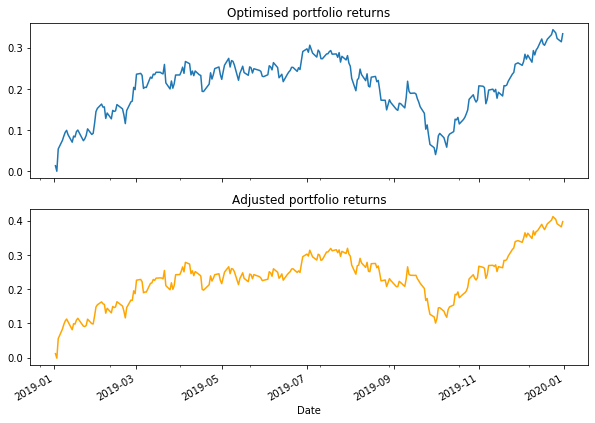

In [3]:
import matplotlib.pyplot as plt

# aggregate to portfolio level
optimised_pf_returns = np.log(optimised_weights.dot(np.exp(ETIHX_log_returns_df.T) - 1) + 1)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 7))
optimised_pf_returns.expanding().apply(lambda x: x.sum()).plot(title='Optimised portfolio returns', ax=axes[0])

p-value for Shaprio test for optimised portfolio returns: 0.930302619934082


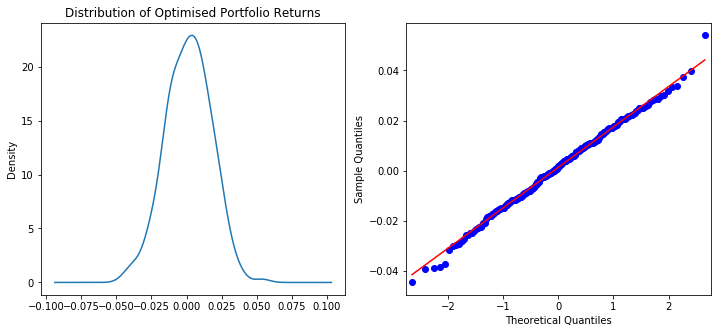

In [295]:
# check distribution of returns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

# plot density
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
optimised_pf_returns.plot(kind='density', ax=axes[0], title='Distribution of Optimised Portfolio Returns')

# qqplot
qqplot(optimised_pf_returns, line='s', ax=axes[1]);

# shapiro test, H0 = population is normally distributed
print(f'p-value for Shaprio test for optimised portfolio returns: {shapiro(optimised_pf_returns)[1]}')

Visual analysis of the log returns suggest that they are normally distributed.  
The p-values for the Shapiro test are also very high, thus we do not reject the null hypothesis that the population is normally distributed. 

Having checked the normality assumptions, we proceed to estimate the 1-day VaR using a parametric approach, which assumes normality of the returns. 

In [282]:
from scipy.stats import norm

# 1 day parametric VaR
vcv = np.cov(ETIHX_log_returns_df.T)

alphas = [0.01, 0.05]


# optimised portfolio
opt_variance = np.dot(optimised_weights, np.dot(vcv, optimised_weights))
opt_pf_mean_return = np.dot(optimised_weights, np.exp(ETIHX_log_returns_df.mean()) - 1)
opt_pf_log_return = np.log(1 + opt_pf_mean_return)

var_results = {}
for alpha in alphas:
    z_alpha = norm.ppf(alpha, loc=0, scale=1)
    opt_pf_var = opt_pf_log_return + (z_alpha * np.sqrt(opt_variance))
    
    # store results
    var_results[f'Optimised {alpha} VaR'] = opt_pf_var
    
    print(f'Optimised portfolio {alpha * 100}% VaR: {-round(opt_pf_var * 100, 3)}%')
    

Optimised portfolio 1.0% VaR: 3.665%
Optimised portfolio 5.0% VaR: 2.565%


The values above are the 1 day VaR expressed in terms of log returns. We see that the adjusted portfolio is slightly less risky. Next, we scale the VaR up to the appropriate time horizons (3/6/9) months.

In [283]:
# scale VaR

horizons = [3, 6, 9]
ndays_per_year = 252

for horizon in horizons:
    for k, v in var_results.items():
        # scale log returns
        scaled_log = v * np.sqrt(horizon/12 * ndays_per_year)
        scaled_simple = 1 - np.exp(scaled_log)

        print(f'{horizon} month {k}: {round(100 * scaled_simple, 3)}%')
    print(f'\n')
        
    

3 month Optimised 0.01 VaR: 25.238%
3 month Optimised 0.05 VaR: 18.422%


6 month Optimised 0.01 VaR: 33.724%
6 month Optimised 0.05 VaR: 25.02%


9 month Optimised 0.01 VaR: 39.576%
9 month Optimised 0.05 VaR: 29.719%




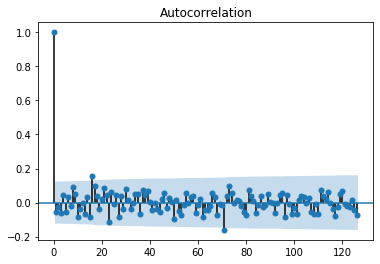

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(optimised_pf_returns, lags=252/2);

The values above are the 3, 6, and 9 month VaR expressed in terms of SIMPLE returns. Obviously, the 9 month VaR would return the highest risk as it is scaled up by the largest factor.

In calculating VaR this way, we are assuming that the log returns are i.i.d and the underlying price movement is driven by geoemtric brownian motion. While longer horizon VaR is usually calculated by adjusting for autocorrelation, we observe that autocorrelation is generally not statistically significant at the 5% significance level for up to 126 lags.  
https://quant.stackexchange.com/questions/7495/square-root-of-time

### Estimating E(R) and Var(R) by CAPM

- Previous methods of estimating E(R) and Var(R) arefor short-term (eg. daily return / weekly return)  
- use CAPM to estimate the distribution of returns for 2020

#### Beta calculation

In [8]:
# SPX 500 2019 data
SPX = get_data_for_multiple_stocks(['^GSPC'], dt.date(2019, 1, 1), dt.date(2019, 12, 31))
SPX_log_returns_df = get_df_by_metric(SPX, 'log_return')
SPX_log_returns_df

0/1


,^GSPC
Date,
2019-01-02,0.001268
2019-01-03,-0.025068
2019-01-04,0.033759
2019-01-07,0.006986
2019-01-08,0.009649
...,...
2019-12-24,-0.000195
2019-12-26,0.005115
2019-12-27,0.000034


In [9]:
# rf rate 2019
rf_2019 = pd.read_csv(join(data_path, 'yield_rate_2019.csv'))
rf_2019.drop(rf_2019.columns.difference(['Date','1 Yr']), 1, inplace=True)

rf_2019['1 Yr'] = rf_2019['1 Yr'].apply(lambda x: x / 100)
rf_2019['Date'] = pd.to_datetime(rf_2019['Date'])
rf_2019.set_index("Date", inplace=True)
rf_2019.rename(columns={'1 Yr': 'risk_free_rate'}, inplace=True)

# align indexes
rf_2019 = SPX_log_returns_df.merge(rf_2019, how='left', left_index=True, right_index=True)['risk_free_rate']
rf_2019.fillna(method='ffill', inplace=True)

rf_2019

Date
2019-01-02    0.0260
2019-01-03    0.0250
2019-01-04    0.0257
2019-01-07    0.0258
2019-01-08    0.0260
               ...  
2019-12-24    0.0153
2019-12-26    0.0153
2019-12-27    0.0151
2019-12-30    0.0157
2019-12-31    0.0159
Name: risk_free_rate, Length: 252, dtype: float64

In [10]:
from scipy.stats import stats

optimised_beta, optimised_r2 = get_beta(np.exp(SPX_log_returns_df['^GSPC']) - 1, optimised_pf_returns, 
                                        rf_2019, return_r2=True)

print(f'beta: {optimised_beta}, r2: {optimised_r2}')

beta: 1.2913226547681742, r2: 0.6280906875941353


**Estimate E(R) and Var(R)**

In [12]:
# estimate E(R)

market_return = 0.1
rf_rate = rf_2019.mean()

opt_exp_return = optimised_beta * (market_return - rf_rate)
print(f'Optimised Portfolio E(R): {opt_exp_return}')

Optimised Portfolio E(R): 0.10267757366131676
Adjusted Portfolio E(R): 0.10172288092508011


In [13]:
# get IV from ATM SPX options

SPX_close_price = get_df_by_metric(SPX, 'Adj Close')
atm_value = SPX_close_price.loc[dt.date(2019, 12, 31)].values[0]
print(f'ATM value: {atm_value}')

# SPX Options
SPY_options = pd.read_csv(join(data_path, 'S&P500.csv'))
SPY_options['exdate'] = pd.to_datetime(SPY_options['exdate'])
SPY_options['date'] = pd.to_datetime(SPY_options['date'])
SPY_options['strike_price'] /= 1000

mask = np.isclose(SPY_options['strike_price'], atm_value, atol=5)
atm_options = SPY_options[mask]

iv = atm_options['impl_volatility'].mean()
print(f'Implied Volatility: {iv}')

ATM value: 3230.780029296875
Implied Volatility: 0.1293395


In [14]:
# estimate Var(R)
opt_var = (np.power(optimised_beta, 2) * np.power(iv, 2)) / optimised_r2
print(f'Optimised Portfolio Risk: {np.sqrt(opt_var)}')

Optimised Portfolio Risk: 0.21074378258576154
Adjusted Portfolio Risk: 0.20702350799190267


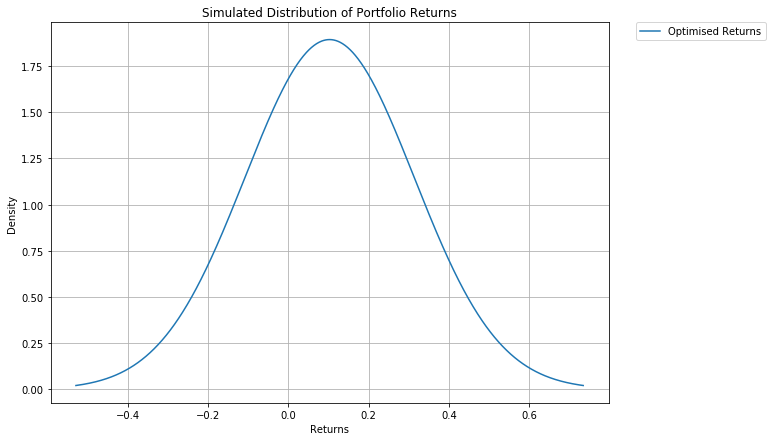

In [284]:
# simulate distribution of returns

fig, axes = plt.subplots(figsize=(10, 7))
opt_x = np.linspace(opt_exp_return - 3 * np.sqrt(opt_var), opt_exp_return + 3 * np.sqrt(opt_var), 1000)
adj_x = np.linspace(adj_exp_return- 3 * np.sqrt(adj_var), adj_exp_return + 3 * np.sqrt(adj_var), 1000)
axes.plot(opt_x, norm.pdf(opt_x, opt_exp_return, np.sqrt(opt_var)),
          label='Optimised Returns')

plt.grid(True)
plt.ylabel("Density")
plt.xlabel("Returns")
plt.title("Simulated Distribution of Portfolio Returns")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [285]:
 # estimate VaR at 1% and 5%
alphas = [0.01, 0.05]

var_results = pd.DataFrame()

for alpha in alphas:
    z_alpha = norm.ppf(alpha, loc=0, scale=1)
    opt_pf_var = opt_exp_return + (z_alpha * np.sqrt(opt_var))
    adj_pf_var = adj_exp_return + (z_alpha * np.sqrt(adj_var))
    
    var_results.loc[alpha, "Optimised Portfolio VaR"] = -opt_pf_var
    
var_results.index.rename("Significance", inplace=True)
var_results

,Optimised Portfolio VaR
Significance,
0.01,0.387586
0.05,0.243965


Based on the estimates for the distriubtion of our portfolio's returns in 2020, we see that there is a 5% chance that our portfolio will return losses of around 24%. This exceeds our investment attitude of a maximum of 20% loss. 

Moving forward, we will identify a suitable cross-hedge strategy for our adjusted portfolio.

**Selecting a suitable index to cross-hedge against**

Next, we find the index that we should use to cross-hedge our portfolio. We will simply fit a linear regression model and select the index that returns the highest R-square.

In [44]:
# download data

tickers = ['IXJ', 'IYH', 'FHLC', '^GSPC']
index_data = get_data_for_multiple_stocks(tickers, dt.date(2019, 1, 1), dt.date(2019, 12, 31))
index_returns = get_df_by_metric(index_data, 'log_return')
index_returns.head()

0/4


,IXJ,IYH,FHLC,^GSPC
Date,,,,
2019-01-02,-0.011719,-0.013811,-0.012665,0.001268
2019-01-03,-0.014210,-0.022513,-0.023058,-0.025068
2019-01-04,0.028397,0.030890,0.030870,0.033759
2019-01-07,0.002813,0.007810,0.009199,0.006986
2019-01-08,0.010307,0.010101,0.010308,0.009649


In [286]:
df = pd.DataFrame()
for index in index_returns.columns:
    beta, rsquare = get_beta(np.exp(index_returns[index]) - 1, optimised_pf_returns, rf_2019, return_r2=True)
    df.loc[index, "beta"] = beta
    df.loc[index, "rsquare"] = rsquare

df

,beta,rsquare
IXJ,1.304787,0.614356
IYH,1.232541,0.659199
FHLC,1.282269,0.694988
^GSPC,1.291323,0.628091


In [87]:
beta, rsquare = df.loc["FHLC"]

Since FHLC has the highest Rsquare, we will purchase put options on FHLC to hedge against portfolio losses.

#### Selection of Options

From our calculation above, we see that our adjusted portfolio is approximately 1.29 times riskier than the FHLC ETF.

As mentioned in our previous report, we wish to have a portfolio VaR of no more than 20%. From our VaR calculations, we observe that in the 6 month horizon, this threshold is breached at both the 1% and 5% significance level. We will use put options to hedge against this drop in the given horizon. 

We choose the 6 month horizon over the 9 month horizon since it is more immediate. Another reason may be that after hedging the 6 month period, we can re-evaluate our positions again at 6 months and decide if we should take any further risk measures to hedge our portfolio for September. 

For the hedging strategy, we aim to achieve a portfolio loss of no more than 20%.

How to read options: https://www.newtraderu.com/2019/03/12/how-to-read-option-contract-symbols/

Options terminology: http://www.cboe.com/education/getting-started/quick-facts/option-terminology#:~:text=The%20contract%20size%20of%20an%20option%20refers%20to%20the%20amount,is%20exercised%20by%20its%20owner.

In [94]:
# load options data
FHLC_options = pd.read_csv(join(data_path, 'FHLC_Fidelity MSCI Health Care Index ETF.CSV'))
FHLC_options['exdate'] = pd.to_datetime(FHLC_options['exdate'])
FHLC_options['strike_price'] /= 1000

cols_to_keep = ['date', 'symbol', 'symbol_flag', 'exdate', 'last_date', 'cp_flag', 'strike_price',
               'best_bid', 'best_offer', 'volume', 'open_interest', 'impl_volatility']

FHLC_options = FHLC_options[cols_to_keep]
FHLC_options

,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility
0,2019/12/31,FHLC 200117C45000,1,2020-01-17,NaN,C,45.0,2.55,6.0,0,0,NaN
1,2019/12/31,FHLC 200117C46000,1,2020-01-17,NaN,C,46.0,1.55,5.8,0,0,NaN
2,2019/12/31,FHLC 200117C47000,1,2020-01-17,NaN,C,47.0,0.65,4.4,0,0,NaN
3,2019/12/31,FHLC 200117C48000,1,2020-01-17,NaN,C,48.0,0.00,3.0,0,0,NaN
4,2019/12/31,FHLC 200117C49000,1,2020-01-17,2019/12/20,C,49.0,0.00,2.9,0,3,0.238518
...,...,...,...,...,...,...,...,...,...,...,...,...
61,2019/12/31,FHLC 200619P47000,1,2020-06-19,2019/12/27,P,47.0,0.45,3.6,0,65,0.250516
62,2019/12/31,FHLC 200619P48000,1,2020-06-19,NaN,P,48.0,0.20,3.9,0,0,NaN
63,2019/12/31,FHLC 200619P49000,1,2020-06-19,NaN,P,49.0,0.10,4.2,0,0,NaN
64,2019/12/31,FHLC 200619P50000,1,2020-06-19,NaN,P,50.0,0.15,4.6,0,0,NaN


In [95]:
# FHLC close price on 31/12/2019
FHLC_close_price = pd.DataFrame(index_data['FHLC']['Adj Close'])
FHLC_close_price.tail()

,Adj Close
Date,
2019-12-24,49.360271
2019-12-26,49.281326
2019-12-27,49.281326
2019-12-30,48.886604
2019-12-31,49.083961


In [96]:
# June Options
mask = FHLC_options['exdate'] == pd.to_datetime(dt.date(2020, 6, 19))
FHLC_june_options = FHLC_options[mask]

# June put options that are out of the money
spot_price = FHLC_close_price.loc[dt.date(2019, 12, 31)].values[0]
oom_mask = (FHLC_june_options['strike_price'] < spot_price) & (FHLC_june_options['cp_flag']=="P")

oom_options = FHLC_june_options[oom_mask]

oom_options.head()

,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility
56,2019/12/31,FHLC 200619P42000,1,2020-06-19,NaN,P,42.0,0.0,2.9,0,0,0.346219
57,2019/12/31,FHLC 200619P43000,1,2020-06-19,NaN,P,43.0,0.0,3.0,0,0,0.322929
58,2019/12/31,FHLC 200619P44000,1,2020-06-19,NaN,P,44.0,0.0,3.1,0,0,NaN
59,2019/12/31,FHLC 200619P45000,1,2020-06-19,2019/12/26,P,45.0,0.1,3.3,0,41,NaN
60,2019/12/31,FHLC 200619P46000,1,2020-06-19,2019/12/02,P,46.0,0.0,3.4,0,1,NaN


In [271]:
# find option that is ~20/1.3% lower than the spot price on 31/12/2019

spot_price = FHLC_close_price.loc[dt.date(2019, 12, 31)].values[0]
max_loss = 0.2
price_at_max_loss = spot_price * (1 - max_loss / beta)
mask = np.isclose(price_at_max_loss, oom_options['strike_price'], atol=50)

print(f'price at maximum tolerated loss: {price_at_max_loss}')
oom_options[mask]

price at maximum tolerated loss: 41.469623959776314


,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility
56,2019/12/31,FHLC 200619P42000,1,2020-06-19,NaN,P,42.0,0.00,2.9,0,0,0.346219
57,2019/12/31,FHLC 200619P43000,1,2020-06-19,NaN,P,43.0,0.00,3.0,0,0,0.322929
58,2019/12/31,FHLC 200619P44000,1,2020-06-19,NaN,P,44.0,0.00,3.1,0,0,NaN
59,2019/12/31,FHLC 200619P45000,1,2020-06-19,2019/12/26,P,45.0,0.10,3.3,0,41,NaN
60,2019/12/31,FHLC 200619P46000,1,2020-06-19,2019/12/02,P,46.0,0.00,3.4,0,1,NaN
61,2019/12/31,FHLC 200619P47000,1,2020-06-19,2019/12/27,P,47.0,0.45,3.6,0,65,0.250516
62,2019/12/31,FHLC 200619P48000,1,2020-06-19,NaN,P,48.0,0.20,3.9,0,0,NaN
63,2019/12/31,FHLC 200619P49000,1,2020-06-19,NaN,P,49.0,0.10,4.2,0,0,NaN


Based on the shortlisted options, it seems best to purchase the put option at strike price of **42** to hedge a drop in FHLC that would correspond to roughly a 20% drop in our portfolio value. 


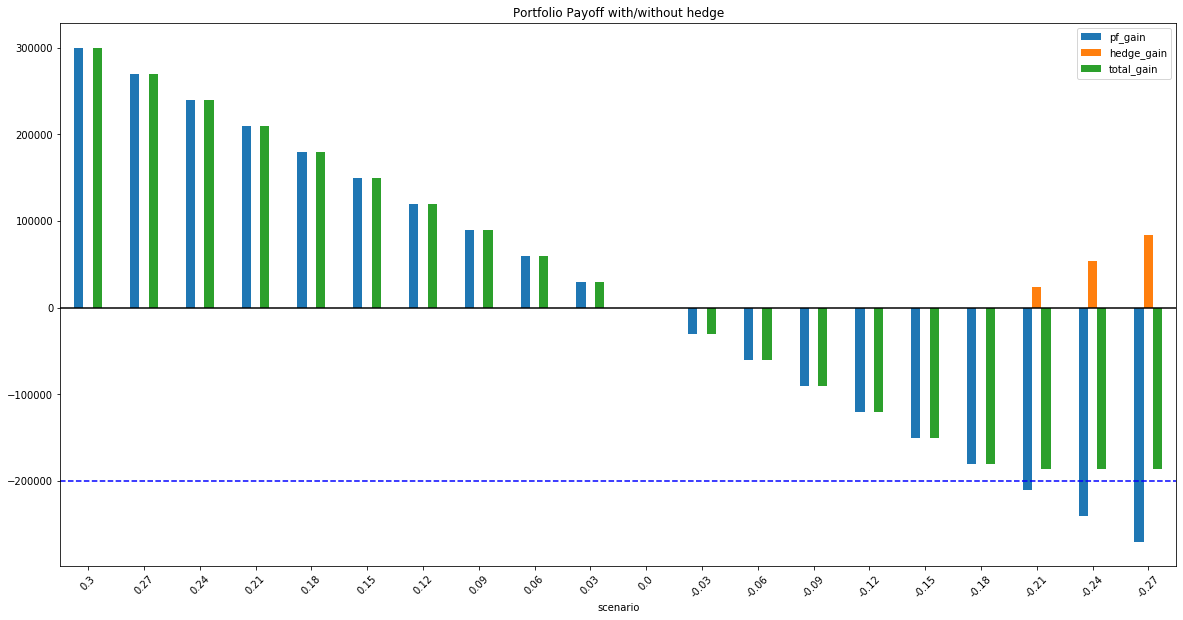

In [215]:
# no. of put options for perfect hedge
portfolio_value = 1000000  # hypothetical
contract_size = 100
FHLC_start_price = FHLC_close_price.loc[dt.date(2019, 12, 31)].values[0]

# how many put contracts do we need to buy so that the exposure to FHLC is same as our portfolio value?
n_contracts = portfolio_value / (contract_size * FHLC_start_price)
n_contracts_adjusted = round(n_contracts * beta)

# simulate payoff
scenarios = np.arange(0.3, -0.3, -0.03)

# init variables
strike_price = 42
scenarios_df = pd.DataFrame()

for i, scenario in enumerate(scenarios):
    pf_gain = portfolio_value * scenario
    
    # assume beta relation holds. calculate how much FHLC will move
    FHLC_curr_price = FHLC_start_price * (1 + scenario / beta)
    
    # effect of hedge
    hedge_gain = n_contracts_adjusted * max(0, contract_size * (strike_price - FHLC_curr_price))

    total_payoff = pf_gain + hedge_gain
    
    scenarios_df.loc[i, 'scenario'] = scenario
    scenarios_df.loc[i, 'pf_gain'] = pf_gain
    scenarios_df.loc[i, 'hedge_gain'] = hedge_gain
    scenarios_df.loc[i, 'total_gain'] = total_payoff

# plot payoff
fig, axes = plt.subplots()
scenarios_df.plot(x='scenario', y=['pf_gain', 'hedge_gain', 'total_gain'],
                  kind='bar', figsize=(20, 10), title="Portfolio Payoff with/without hedge", ax=axes)

labels = [round(x, 3) for x in scenarios_df['scenario'].values]
axes.set_xticklabels(labels)
plt.axhline(0, linestyle='-', color='black')
plt.axhline(-(0.2 * portfolio_value), linestyle='--', color='blue')
plt.xticks(rotation=45);

This plot illustrates the effect of the hedge, where losses greater than 20% are offset by gains from the puts, thereby limiting the entire portfolio loss to no greater than 20% (it's not exactly 20% since we rounded the number of put options purchased).

However, such an approach would only consider the payoff earned from purchasing the put option in offsetting the hypothetical loss from the portfolio. In reality, we need to factor in the cost of the option as well.

Since the premium from each option is approximately 3, we should actually purchase the put option with strike at 41.4 + 3 = 45.

Weight allocated to hedge: 7.99%


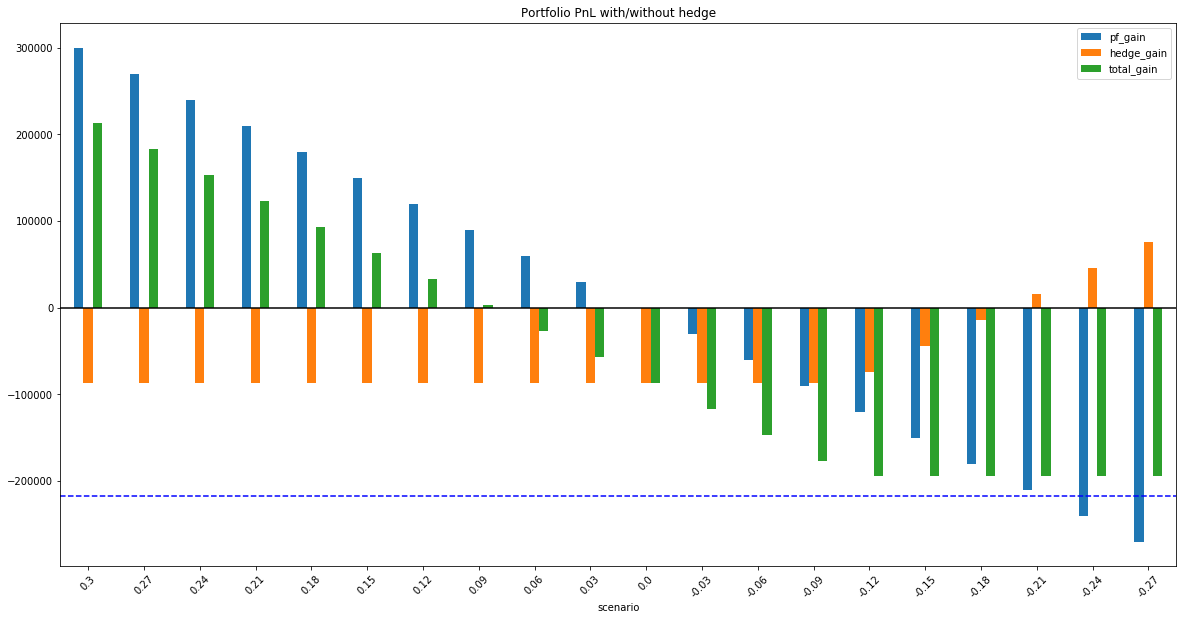

In [272]:
# calculate cost of hedge
premium = 3.3
hedge_cost = premium * contract_size * round(n_contracts_adjusted)
hedge_weight = hedge_cost / (hedge_cost + portfolio_value)
print(f'Weight allocated to hedge: {round(hedge_weight * 100, 2)}%')

# simulate PnL
scenarios = np.arange(0.3, -0.3, -0.03)

# init variables
strike_price = 45
scenarios_df = pd.DataFrame()

for i, scenario in enumerate(scenarios):
    pf_gain = portfolio_value * scenario
    
    # assume beta relation holds. calculate how much FHLC will move
    FHLC_curr_price = FHLC_start_price * (1 + scenario / beta)
    
    # effect of hedge
    hedge_gain = n_contracts_adjusted * max(0, contract_size * (strike_price - FHLC_curr_price))
    hedge_pnl = hedge_gain - hedge_cost

    total_payoff = pf_gain + hedge_pnl
    
    scenarios_df.loc[i, 'scenario'] = scenario
    scenarios_df.loc[i, 'pf_gain'] = pf_gain
    scenarios_df.loc[i, 'hedge_gain'] = hedge_pnl
    scenarios_df.loc[i, 'total_gain'] = total_payoff

# plot payoff
fig, axes = plt.subplots()
scenarios_df.plot(x='scenario', y=['pf_gain', 'hedge_gain', 'total_gain'],
                  kind='bar', figsize=(20, 10), title="Portfolio PnL with/without hedge", ax=axes)

labels = [round(x, 3) for x in scenarios_df['scenario'].values]
axes.set_xticklabels(labels)
plt.axhline(0, linestyle='-', color='black')
plt.axhline(-(0.2 * (hedge_cost + portfolio_value)), linestyle='--', color='blue')
plt.xticks(rotation=45);

We see that the maximum loss is still limited to roughly 20% of our initial portfolio value. However, the distribution of returns is highly asymmetrical around 0. If the portfolio loses less than 20% of its value and the options expire out of the money, our losses are amplified by the options' position. On the same note, our gains are muted since any profits from our assets are offset by the losses in the options' positions.  

This shows that financing such a hedging strategy is expensive. Granted, the premium quoted might be too high considering the best bid was only 0.10. Nonetheless, allocating 7.99% of our portfolio to a hedge seems excessive, considering the expected returns are only around 10%. 

**Collar Option Strategy**

As seen above, the cost of setting up a protective put can be expensive. In this section, we try to do a collar strategy by simultaneously writing a call and purchasing a put option. The idea is that we use the premium collected from the call to offset some of the cost of the put option. 

First, we should establish what we deem an acceptable ceiling to our profits. We will do so using the estimates of our portfolio's expected returns calculated above.

Let's assume we are willing to forgo returns that are simulated to only happen 25% of the time. (i.e the top quantile of simulated returns)

In [227]:
# find out 25th percentile for expected return
np.random.seed(1)
simulated = pd.Series(np.random.normal(adj_exp_return/2, np.sqrt(adj_var/4), 1000))  # semi-annual returns
simulated.quantile(0.75)

0.12373359662205531

In [277]:
FHLC_june_options[FHLC_june_options['cp_flag']=='C']

,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility
46,2019/12/31,FHLC 200619C42000,1,2020-06-19,2019/11/26,C,42.0,5.50,10.8,0,20,0.171460
47,2019/12/31,FHLC 200619C43000,1,2020-06-19,NaN,C,43.0,4.60,9.9,0,0,0.171916
48,2019/12/31,FHLC 200619C44000,1,2020-06-19,NaN,C,44.0,3.70,9.0,0,0,0.166534
49,2019/12/31,FHLC 200619C45000,1,2020-06-19,NaN,C,45.0,2.85,8.1,0,0,0.160901
50,2019/12/31,FHLC 200619C46000,1,2020-06-19,NaN,C,46.0,2.05,7.3,0,0,0.159365
51,2019/12/31,FHLC 200619C47000,1,2020-06-19,NaN,C,47.0,1.25,6.5,0,0,0.152749
52,2019/12/31,FHLC 200619C48000,1,2020-06-19,NaN,C,48.0,0.50,5.0,0,0,0.114269
53,2019/12/31,FHLC 200619C49000,1,2020-06-19,NaN,C,49.0,0.15,5.0,0,0,NaN
54,2019/12/31,FHLC 200619C50000,1,2020-06-19,NaN,C,50.0,0.20,4.3,0,0,NaN
55,2019/12/31,FHLC 200619C51000,1,2020-06-19,NaN,C,51.0,0.15,3.8,0,0,NaN


In [229]:
# calculate equivalent price for FHLC

FHLC_high = FHLC_start_price * (1 + simulated.quantile(0.75) / beta)
print(f'Equivalent FHLC Price: {FHLC_high}')

# find call options
mask = (FHLC_june_options['cp_flag']=='C') & (FHLC_june_options['strike_price'] > FHLC_start_price)
oom_calls = FHLC_june_options[mask]
oom_calls

Equivalent FHLC Price: 53.794708327391184


,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,impl_volatility
54,2019/12/31,FHLC 200619C50000,1,2020-06-19,NaN,C,50.0,0.20,4.3,0,0,NaN
55,2019/12/31,FHLC 200619C51000,1,2020-06-19,NaN,C,51.0,0.15,3.8,0,0,NaN


In [265]:
# calculate potential scenarios

scenarios = np.arange(0.3, -0.3, -0.03)

# init variables
put_premium = 3.6
put_strike = 47  # select the put option that is 'equidistant" from the spot price
FHLC_start_price = FHLC_close_price.loc[dt.date(2019, 12, 31)].values[0]
pf_start_value = 1000000

call_premium = 0.15
call_strike = 51

scenarios_df = pd.DataFrame()

# premium earned from call
call_earn = n_contracts_adjusted * call_premium * contract_size

# premium paid for put
put_cost = n_contracts_adjusted * put_premium * contract_size

# net premimum paid
net_premium = put_cost - call_earn

for i, scenario in enumerate(scenarios):
    pf_gain = pf_start_value * scenario
    
    # assume beta relation holds. calculate how much FHLC will move
    FHLC_curr_price = FHLC_start_price * (1 + scenario / beta)
    
    # evaluate put
    put_value = n_contracts_adjusted * max(0, contract_size * (put_strike - FHLC_curr_price))
    
    # evaluate call
    call_value = n_contracts_adjusted * max(0, contract_size * (FHLC_curr_price - call_strike))
    
    options_payoff = put_value - call_value
    options_PnL = options_payoff - net_premium
    
    gain_with_hedge = pf_gain + options_PnL
    
    scenarios_df.loc[i, 'scenario'] = scenario
    scenarios_df.loc[i, 'pf_gain'] = pf_gain
    scenarios_df.loc[i, 'options_PnL'] = options_PnL
    scenarios_df.loc[i, 'options_payoff'] = options_payoff
    scenarios_df.loc[i, 'total_gain'] = gain_with_hedge

scenarios_df.head()

,scenario,pf_gain,options_PnL,options_payoff,total_gain
0,0.30,300000.0,-340728.802545,-249993.802545,-40728.802545
1,0.27,270000.0,-310690.241001,-219955.241001,-40690.241001
2,0.24,240000.0,-280651.679457,-189916.679457,-40651.679457
3,0.21,210000.0,-250613.117912,-159878.117912,-40613.117912
4,0.18,180000.0,-220574.556368,-129839.556368,-40574.556368


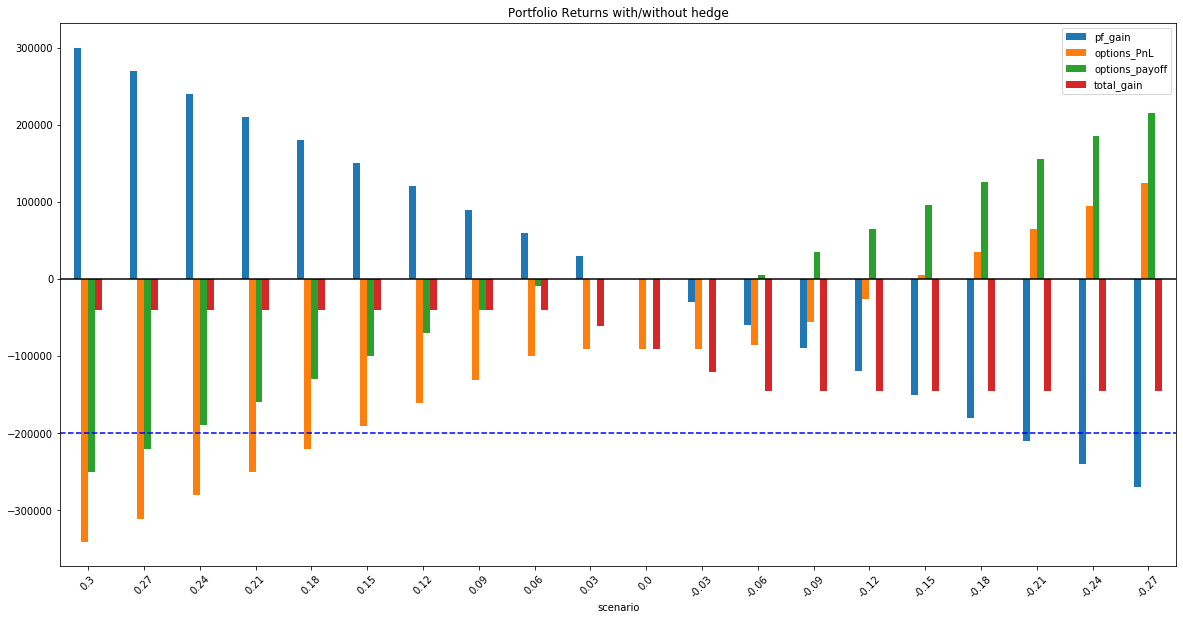

In [266]:
# plot gains / losses
fig, axes = plt.subplots()
scenarios_df.plot(x='scenario', y=['pf_gain', 'options_PnL', 'options_payoff', 'total_gain'],
                  kind='bar', figsize=(20, 10), title="Portfolio Returns with/without hedge", ax=axes)

labels = [round(x, 3) for x in scenarios_df['scenario'].values]
axes.set_xticklabels(labels)
plt.axhline(0, linestyle='-', color='black')
plt.axhline(-(0.2 * portfolio_value), linestyle='--', color='blue')
plt.xticks(rotation=45);

Unfortunately, the strategy doesn't work as the premiums paid for the put options are much greater than the premiums collected for the call options.

#### Analysis of Portfolio Performance with Hedge

In [123]:
# FHLC price in 2020
FHLC_2020 = get_data_for_multiple_stocks(['FHLC'], dt.date(2020, 1, 1), dt.date(2020, 10, 30))
FHLC_price_2020 = get_df_by_metric(FHLC_2020, 'Adj Close')
FHLC_price_2020.head()

0/1


,FHLC
Date,
2019-12-31,49.083961
2020-01-02,49.123436
2020-01-03,48.748447
2020-01-06,49.064232
2020-01-07,48.955681


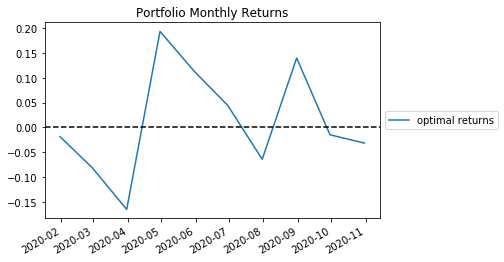

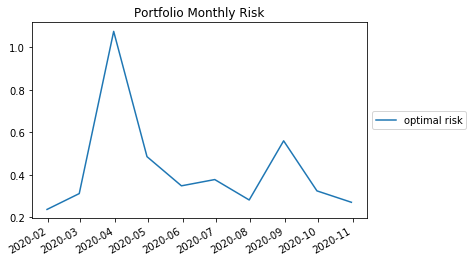

In [288]:
# returns without hedging
delisted_assets={'MNTA': dt.date(2020, 8, 19),
                 'AIMT': dt.date(2020, 8, 31)}

ETIHX_2020 = load_file(join(data_path, 'ETIHX_assets_2020.pickle'))
ETIHX_2020_log_returns_df = get_df_by_metric(ETIHX_2020, 'log_return')
portfolios = [(ETIHX_2020_log_returns_df, optimised_weights, delisted_assets)]

results = pd.DataFrame()
for portfolio in portfolios:
    monthly_return, monthly_risk = evaluate_portfolio(portfolio[0], portfolio[1], portfolio[2])
    results = pd.concat([results, monthly_return, monthly_risk], axis=1)

portfolio_names = ['optimal']
col_names = []
for name in portfolio_names:
    col_names.append(f'{name} returns')
    col_names.append(f'{name} risk')

results.columns = col_names

# compare returns
return_cols = [c for c in results.columns if 'returns' in c]
results[return_cols].plot(title='Portfolio Monthly Returns')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.axhline(0, linestyle='--', color='black')
    
# compare risk
risk_cols = [c for c in results.columns if 'risk' in c]
results[risk_cols].plot(title='Portfolio Monthly Risk')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [289]:
# returns with hedging

hedge_weight = 0.0799
amt_remaining = 1 - hedge_weight

# rebalance portfolio weights
optimised_rebalanced = optimised_weights / amt_remaining


exp_date = dt.date(2020, 6, 19)
exp_price = FHLC_price_2020.loc[exp_date].values[0]
hedge_return = max((strike_price - exp_price), 0) / premium - 1
pf_hedge_return = hedge_weight * hedge_return

# update results_w_hedge
portfolios = [(ETIHX_2020_log_returns_df, optimised_rebalanced, delisted_assets)]

results_w_hedge = pd.DataFrame()
for portfolio in portfolios:
    monthly_return, monthly_risk = evaluate_portfolio(portfolio[0], portfolio[1], portfolio[2])
    results_w_hedge = pd.concat([results_w_hedge, monthly_return], axis=1)

portfolio_names = ['optimal']
col_names = []
for name in portfolio_names:
    col_names.append(f'{name} returns')


results_w_hedge.columns = col_names

# add hedge return to portfolio monthly returns
results_w_hedge.loc[pd.to_datetime(dt.date(2020, 6, 30))]['optimal returns'] += pf_hedge_return

results_w_hedge

,optimal returns
2020-01-31 00:00:00,-0.020363
2020-02-29 00:00:00,-0.088359
2020-03-31 00:00:00,-0.182531
2020-04-30 00:00:00,0.210933
2020-05-31 00:00:00,0.122562
2020-06-30 00:00:00,-0.032268
2020-07-31 00:00:00,-0.069944
2020-08-31 00:00:00,0.140581
2020-09-30 00:00:00,-0.014829
2020-10-31 00:00:00,-0.031526


Price at start: 49.083961486816406
Price at expiry: 49.59359359741211


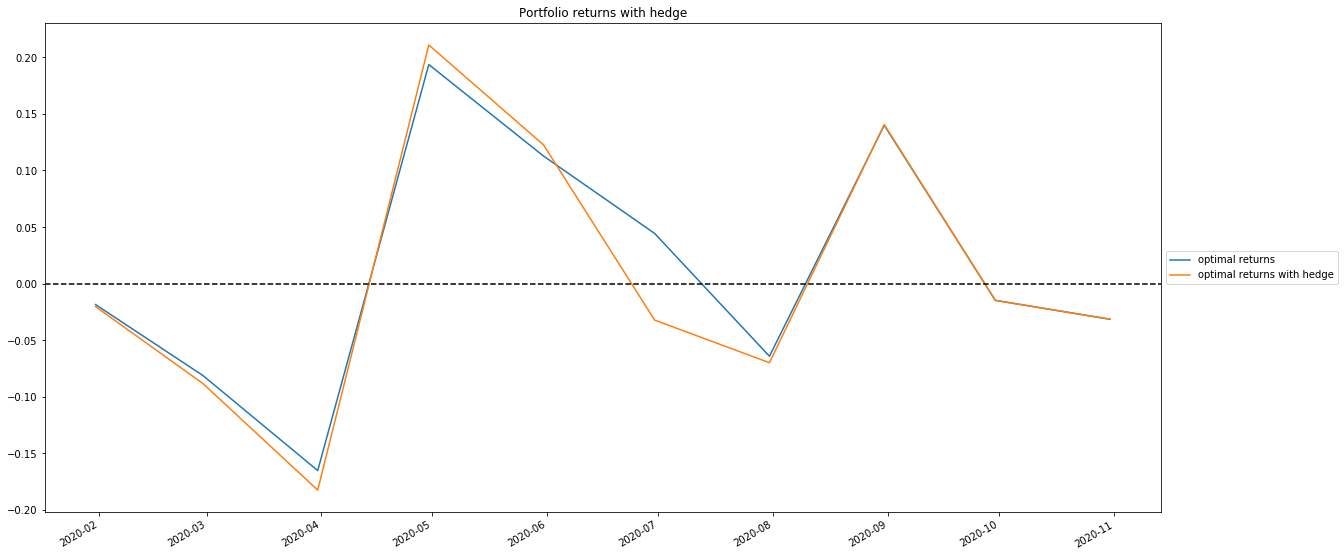

In [291]:
final_results = results.merge(results_w_hedge, how='left', left_index=True, right_index=True, 
                              suffixes=("", " with hedge"))

final_results[['optimal returns', 'optimal returns with hedge']].plot(figsize=(20, 10), title='Portfolio returns with hedge')
plt.axhline(0, linestyle='--', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

print(f'Price at start: {FHLC_start_price}')
print(f'Price at expiry: {exp_price}')

Our portfolio had a net loss despite the stocks having positive returns at the end of June. 